In [ ]:
import os
for dirname, _, filenames in os.walk('/content/BERT'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!wget "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
!tar -xzvf "aclImdb_v1.tar.gz" ""

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
!pip install pytorch-nlp
!pip install pytorch-pretrained-bert
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 115.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.5 MB/s eta 0:00:00


In [ ]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
# from torchnlp.datasets import imdb_dataset      # --> We are using our own uploaded dataset.
from pytorch_pretrained_bert import BertTokenizer
from tensorflow import keras 
from keras.utils import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
from transformers import BertConfig
%matplotlib inline

Initializing seed values to stabilize the outcomes.

In [ ]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)

In [ ]:
train_texts = []
train_labels = []
test_texts = []
test_labels = []

train_lemstop_texts = []
test_lemstop_texts = []

for commentFile in os.listdir("/content/aclImdb/train/neg"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/train/neg/" + commentFile, "r") as f:
    
    for line in f:

      train_texts.append(line)

      #lemmatize and remove stop words
      # line = lemmatize_text(line)
      # line = remove_stopwords(line)
      train_lemstop_texts.append(line)


      train_labels.append("neg")

for commentFile in os.listdir("/content/aclImdb/train/pos"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/train/pos/" + commentFile, "r") as f:
    
    for line in f:

      train_texts.append(line)

      #lemmatize and remove stop words
      # line = lemmatize_text(line)
      # line = remove_stopwords(line)
      train_lemstop_texts.append(line)

      train_labels.append("pos")

for commentFile in os.listdir("/content/aclImdb/test/neg"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/test/neg/" + commentFile, "r") as f:
    
    for line in f:

      test_texts.append(line)

      #lemmatize and remove stop words
      # line = lemmatize_text(line)
      # line = remove_stopwords(line)
      test_lemstop_texts.append(line)

      test_labels.append("neg")

for commentFile in os.listdir("/content/aclImdb/test/pos"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/test/pos/" + commentFile, "r") as f:
    
    for line in f:

      test_texts.append(line)

      #lemmatize and remove stop words
      # line = lemmatize_text(line)
      # line = remove_stopwords(line)
      test_lemstop_texts.append(line)

      test_labels.append("pos")



In [ ]:
train_texts[0]

"From the creators of Shrek\x85\x85\x85\x85.. OK, that grabbed my attention.<br /><br />Well the creators of Shrek also made Madagascar. Madagascar was half as good as Shrek.<br /><br />And now Flushed Away is half as good as Madagascar.<br /><br />That means Flushed Away isn't good. The animation and all that special effects were extremely good but the movie wasn't.<br /><br />The story of this movie was only meant for kids. It's seriously not possible for adults to actually love this flick.<br /><br />But there were many jokes meant for adults. I bet kids dint understand the jokes.<br /><br />Despite that I dint like this flick.<br /><br />I am completely disappointed. 4/10"

In [ ]:
import numpy as np

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [ ]:
train_texts = np.array(train_texts)
train_labels = np.array(train_labels)
test_texts = np.array(test_texts)
test_labels = np.array(test_labels)

train_texts, train_labels = unison_shuffled_copies(train_texts, train_labels)
test_texts, test_labels = unison_shuffled_copies(test_texts, test_labels)

num_train_values = 25000
num_test_values = 10000

train_texts, train_labels = train_texts[:num_train_values], train_labels[:num_train_values]
test_texts, test_labels = test_texts[:num_test_values], test_labels[:num_test_values]
train_data = train_texts

TEMPORARY

In [ ]:
# path = '/content/BERT/'

# train_data = pd.read_csv(path + 'train.csv')
# test_data = pd.read_csv(path + 'test.csv')

# # experimenting here with a sample of dataset, to avoid memory overflow.
# train_data = train_data[:200]
# test_data = test_data[:50]

# train_data = train_data.to_dict(orient='records')
# test_data = test_data.to_dict(orient='records')
# type(train_data)

# train_texts, train_labels = list(zip(*map(lambda d: (d['text'], d['sentiment']), train_data)))
# test_texts, test_labels = list(zip(*map(lambda d: (d['text'], d['sentiment']), test_data)))

visualizing sentences lengths

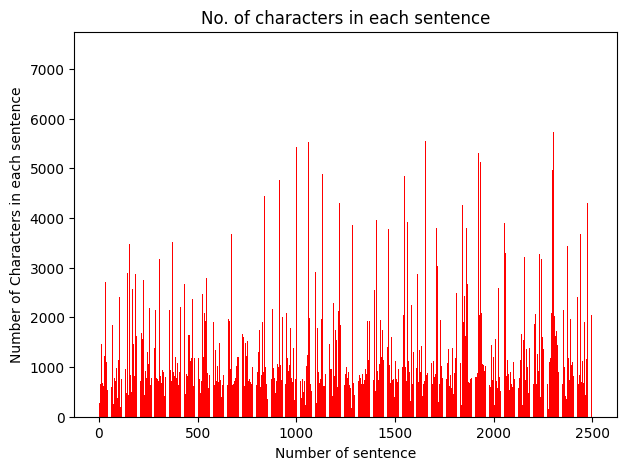

In [ ]:
sentences = [len(sent) for sent in train_texts]

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.bar(range(1,len(train_data)+1), sentences, color = ['red'])
plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence');

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

100%|██████████| 231508/231508 [00:00<00:00, 351428.90B/s]


In [ ]:
tokenizer.tokenize('Hi my name is Simo')

['hi', 'my', 'name', 'is', 'sim', '##o']

In [ ]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], test_texts))

len(train_tokens), len(test_tokens)

(2500, 1000)

Prepare Token Ids

In [ ]:
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")

train_tokens_ids.shape, test_tokens_ids.shape

((2500, 512), (1000, 512))

In [ ]:
train_y = np.array(train_labels) == 'pos'
test_y = np.array(test_labels) == 'pos'
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)

((2500,), (1000,), 0.5, 0.473)

Now Masking few random IDs from each sentences to remove Biasness from model.

In [ ]:
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]

Baseline BERT

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(train_labels[0])

neg


In [ ]:
baseline_model = make_pipeline(CountVectorizer(ngram_range=(1,3)), LogisticRegression()).fit(train_texts, train_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
baseline_predicted = baseline_model.predict(test_texts)

In [ ]:
print(classification_report(test_labels, baseline_predicted))
print("Accuracy: " + str(accuracy_score(test_labels, baseline_predicted)))

              precision    recall  f1-score   support

         neg       0.85      0.81      0.83       527
         pos       0.80      0.84      0.82       473

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

Accuracy: 0.823


In [ ]:
tup1 = ('I love this artist oh my god but the movie seriously sucked', 'i hate this movie it is so boring');
print(baseline_model.predict(tup1))

['pos' 'pos']


In [ ]:
class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None, output_attentions =True):
        encoded_output, pooled_output = self.bert(tokens, attention_mask=masks, output_all_encoded_layers=True)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba,encoded_output

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'0.0M'

Show GPU

In [ ]:
! nvidia-smi

Fri Apr 14 20:04:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.empty_cache()   # Clearing Cache space for a fresh Model run
bert_clf = BertBinaryClassifier()
bert_clf = bert_clf.cuda()     # running BERT on CUDA_GPU

100%|██████████| 407873900/407873900 [00:32<00:00, 12502147.13B/s]


In [ ]:
x = torch.tensor(train_tokens_ids[:3]).to(device)
y, pooled = bert_clf.bert(x, output_all_encoded_layers=True)
x.shape, pooled.shape

(torch.Size([3, 512]), torch.Size([3, 768]))

In [ ]:
y,output = bert_clf(x)
y.cpu().detach().numpy()  

array([[0.41721913],
       [0.40251803],
       [0.3791389 ]], dtype=float32)

In [ ]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'6272.414208M'

In [ ]:
y, x, pooled = None, None, None
torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'6272.414208M'

In [ ]:
BATCH_SIZE = 8
EPOCHS = 10

In [ ]:
train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()

test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)

str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'6272.393216M'

In [ ]:
train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
param_optimizer = list(bert_clf.sigmoid.named_parameters()) 
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

In [ ]:
optimizer = Adam(bert_clf.parameters(), lr=3e-6)

In [ ]:
torch.cuda.empty_cache()   # Clearing Cache space for a fresh Model run

In [ ]:
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
        print(str(torch.cuda.memory_allocated(device)/1000000 ) + 'M')
        logits,ouputs = bert_clf(token_ids, masks)
        
        loss_func = nn.BCELoss()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
        batch_loss = loss_func(logits, labels)
        train_loss += batch_loss.item()
        
        
        bert_clf.zero_grad()
        batch_loss.backward()        
        
 
        clip_grad_norm_(parameters=bert_clf.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / BATCH_SIZE, train_loss / (step_num + 1)))

Epoch:  10
312/312.5 loss: 0.04152630332942171 


In [ ]:
bert_clf.eval()
bert_predicted = []
all_logits = []
_,outputs = bert_clf(token_ids, masks)
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        logits,outputs = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])

In [ ]:
np.mean(bert_predicted)

0.518

In [ ]:
print(classification_report(test_y, bert_predicted))
print("Accuracy: " + str(accuracy_score(test_y, bert_predicted)))

              precision    recall  f1-score   support

       False       0.95      0.87      0.91       527
        True       0.86      0.95      0.90       473

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.91      0.91      0.91      1000

Accuracy: 0.905


Code to output attention matrix

In [ ]:
one_head = outputs[0]

In [ ]:
import math
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
def attention_transf(query, key, value):
    "Compute 'Scaled Dot Product Attention'"
    
    # scaling factor for scores
    d_k = query.size(-1)
    
    # matrix multiplication to get every dot product for query and transposed key
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    
    # apply softmax of the scores on the last dimensions (= sequence length)
    p_attn = F.softmax(scores, dim = -1)
    
    # matrix multiplication of attention matrix and value matrix to get output based
    out = torch.matmul(p_attn, value)
    
    return out, p_attn

In [ ]:
out, p_attn = attention_transf(one_head, one_head, one_head)

In [ ]:
p_attn[0,0].sum().item()

1.0

In [ ]:
p_attn.sum(dim=2)

tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
       device='cuda:0')

In [ ]:
p_attn[0].shape


torch.Size([512, 512])

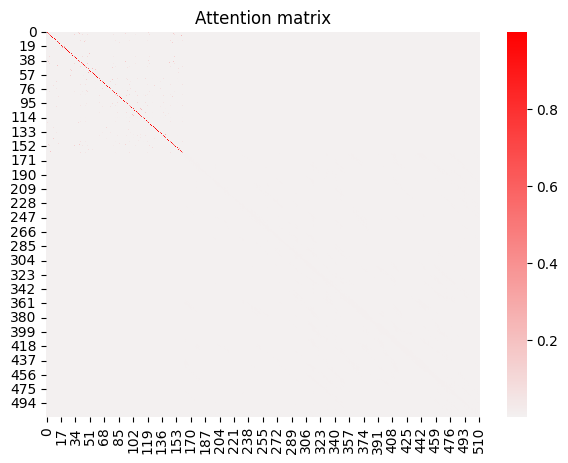

In [ ]:
sns.heatmap(p_attn[0].cpu().numpy(), annot=False, cmap=sns.light_palette('red', as_cmap=True), linewidths=0).set_title('Attention matrix');

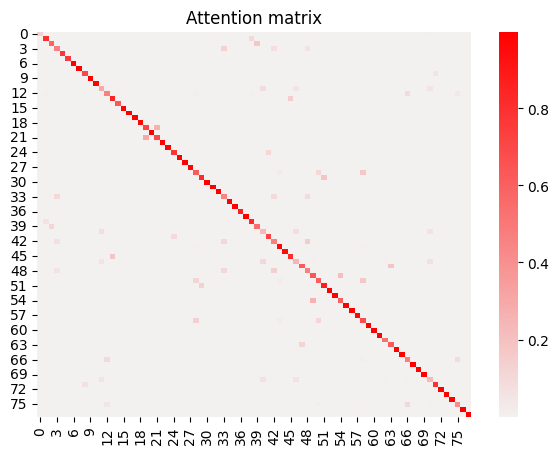

In [ ]:
sns.heatmap(p_attn[0][0:78,0:78].cpu().numpy(), annot=False, cmap=sns.light_palette('red', as_cmap=True), linewidths=0).set_title('Attention matrix');

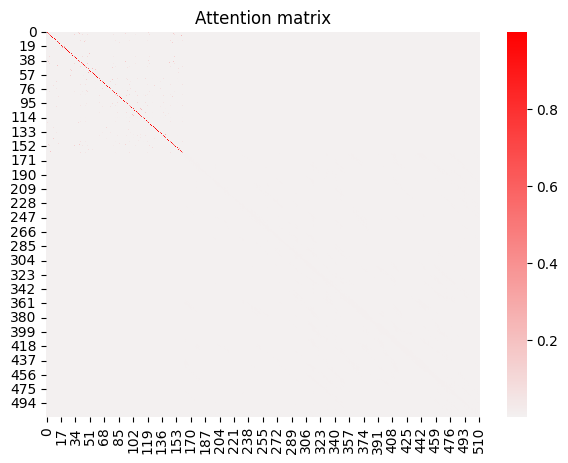

In [ ]:
sns.heatmap(p_attn[0].cpu().numpy(), annot=False, cmap=sns.light_palette('red', as_cmap=True), linewidths=0).set_title('Attention matrix');

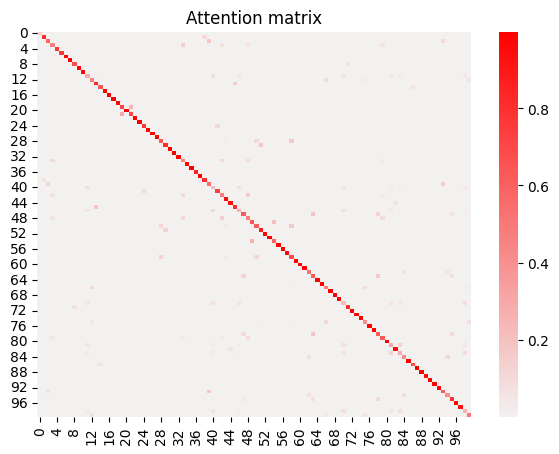

In [ ]:
# attention matrix
sns.heatmap(p_attn[0][0:100,0:100].cpu().numpy(), annot=False, cmap=sns.light_palette('red', as_cmap=True), linewidths=0).set_title('Attention matrix');

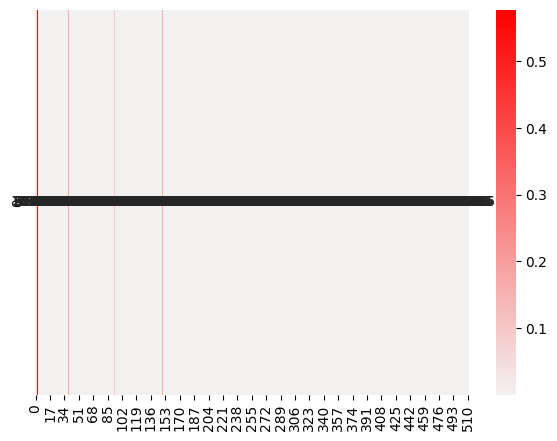

In [ ]:
sns.heatmap(p_attn[0,2].cpu().view(1,-1).numpy(), annot=True, cmap=sns.light_palette('red', as_cmap=True), linewidths=0);

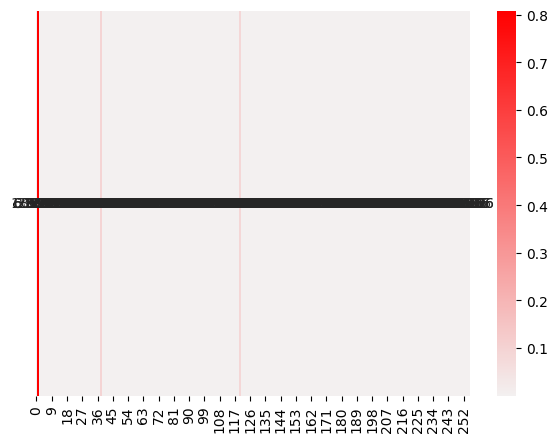

In [ ]:
sns.heatmap(p_attn[0,1][0:256].cpu().view(1,-1).numpy(), annot=True, cmap=sns.light_palette('red', as_cmap=True), linewidths=0);

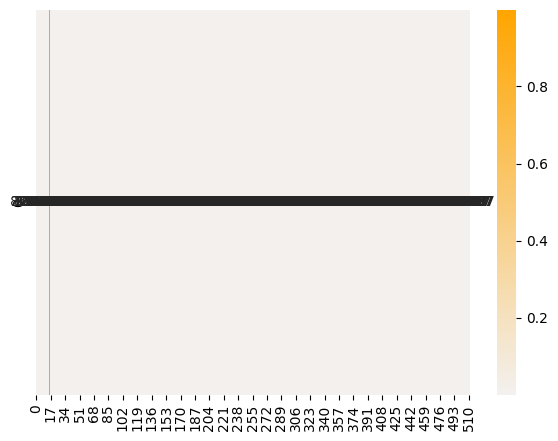

In [ ]:
sns.heatmap(p_attn[0,15].cpu().view(1,-1).numpy(), annot=True, cmap=sns.light_palette('orange', as_cmap=True), linewidths=0);

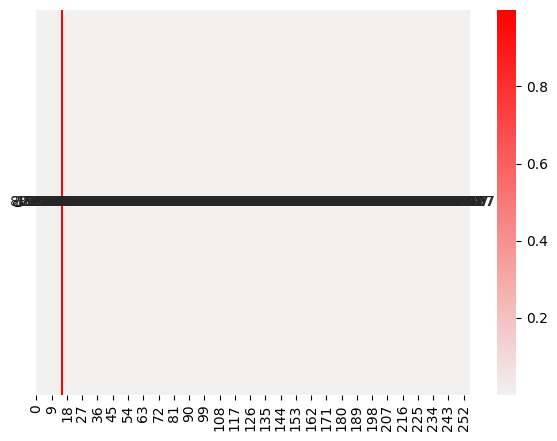

In [ ]:
sns.heatmap(p_attn[0,16][0:256].cpu().view(1,-1).numpy(), annot=True, cmap=sns.light_palette('red', as_cmap=True), linewidths=0);